# Actividad de aprendizaje Supervisado

Objetivo: 

Aplicar técnicas de aprendizaje supervisado para resolver un problema real de clasificación o regresión, siguiendo un flujo completo de ciencia de datos: exploración, preparación, modelado, evaluación y conclusiones.

## Opción A: Clasificación – Dataset Titanic
Dataset: Titanic Dataset (Kaggle) https://www.kaggle.com/datasets/amineipad/titanic-dataset
Problema: Predecir si un pasajero sobrevivió o no al hundimiento del Titanic por medio de la variable Survived (0 = No sobrevivió, 1 = Sobrevivió)

### Preparación de entorno

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


### Carga de Dataset

In [2]:
ruta = r"C:\Users\vivia\OneDrive\Desktop\Data science\Ejercicios-BIT--Viviana-Gonzalez-\Python\Bases de datos\Titanic-Dataset.csv"
df = pd.read_csv(ruta)
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Limpieza de datos

In [3]:
df_clean = df.copy()

In [4]:
# Valores nulos
df.isnull().sum()

# Tratamiento de valores nulos
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())
df_clean['Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])

# Verificación final
df_clean.isnull().sum()
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_clean.drop(columns=['Cabin'], inplace=True)

# Eliminar columnas irrevelantes
df_clean.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)


In [6]:
df_clean.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### EDA básico (exploración)

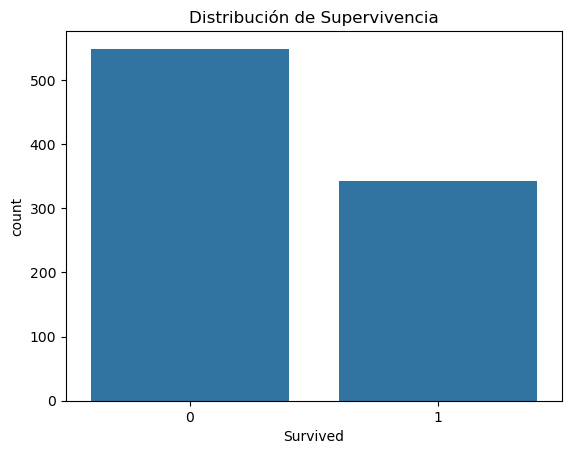

In [7]:
# Vista general
sns.countplot(x='Survived', data=df_clean)
plt.title('Distribución de Supervivencia')
plt.show()

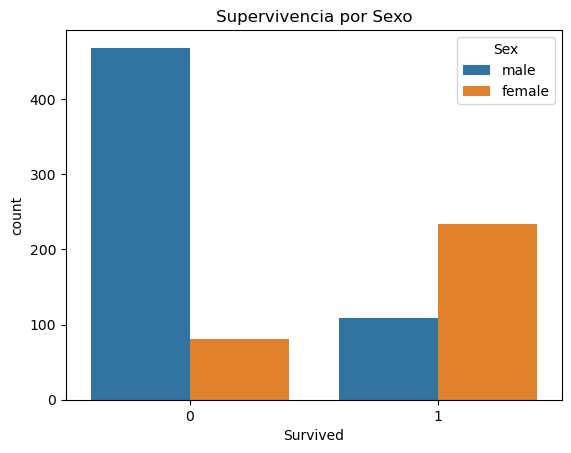

In [8]:
# Supervivencia por sexo
sns.countplot(x='Survived', hue='Sex', data=df_clean)
plt.title('Supervivencia por Sexo')
plt.show()

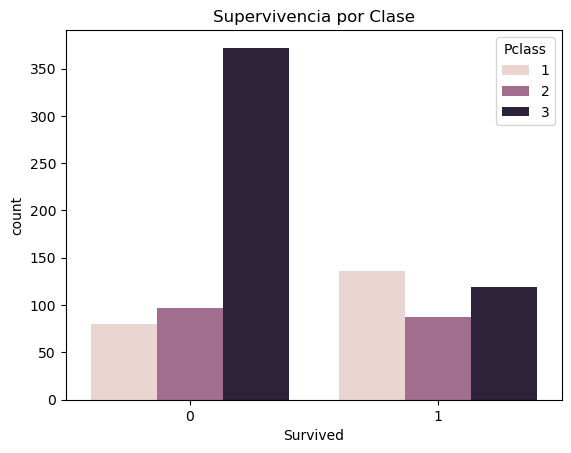

In [9]:
# Supervivencia por clase
sns.countplot(x='Survived', hue='Pclass', data=df_clean)
plt.title('Supervivencia por Clase')
plt.show()

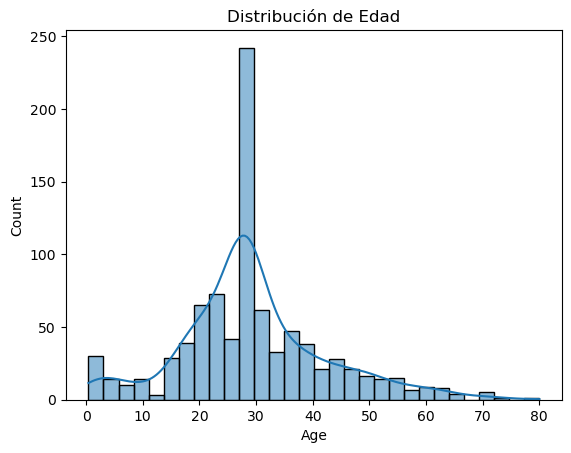

In [10]:
# Distribución por edad 
sns.histplot(df_clean['Age'], bins=30, kde=True)
plt.title('Distribución de Edad')
plt.show()

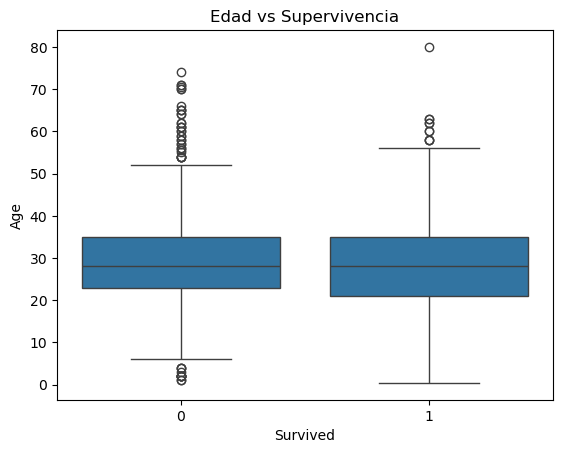

In [11]:
# Edad vs Supervivencia
sns.boxplot(x='Survived', y='Age', data=df_clean)
plt.title('Edad vs Supervivencia')
plt.show()

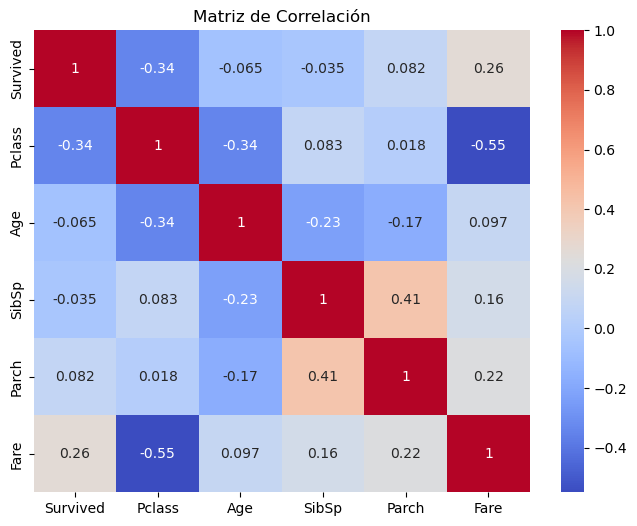

In [12]:
# Correlación entre variables númericas
df_numeric = df_clean.select_dtypes(include='number')

plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

#### Análisis de resultados de las gráficas
1- Supervivencia general
Se observa que murieron más personas de las que sobrevivieron, lo cual indica que el evento tuvo una alta tasa de mortalidad.

2- Supervivencia según sexo
Los resultados muestran que:
Murieron más hombres que mujeres
Sobrevivieron más mujeres que hombres
Esto sugiere que el sexo fue un factor relevante en la probabilidad de supervivencia, posiblemente relacionado con la priorización de mujeres durante la evacuación.

3️- Supervivencia según clase (Pclass)

En cuanto a la clase del pasajero:
- La clase 3 presentó el mayor número de fallecidos
- La clase 1 tuvo mayor proporción de sobrevivientes
- La clase 2 presenta valores intermedios
Esto indica que pertenecer a una clase socioeconómica más alta aumentó las probabilidades de supervivencia.

4️- Edad y supervivencia
En el análisis de edad:
Se observa una mayor concentración de pasajeros alrededor de los 30 años
Sin embargo, las medianas y la distribución de edad entre sobrevivientes y fallecidos son similares
Esto sugiere que la edad promedio no fue un factor determinante para la supervivencia, al menos de manera directa.

##### Análisis del Heatmap de correlación
 - Survived vs Pclass (−0.34)
Existe una correlación negativa moderada.
Dado que la clase 1 representa mayor estatus y la clase 3 el menor, este valor indica que a medida que el número de clase aumenta (de 1 a 3), disminuye la probabilidad de sobrevivir.

- Survived vs Fare (0.26)
Se observa una correlación positiva moderada entre el precio del boleto y la supervivencia.
Esto sugiere que los pasajeros que pagaron tarifas más altas tuvieron mayores probabilidades de sobrevivir, reforzando la idea de que el nivel socioeconómico influyó en el resultado.

- Survived vs Age (−0.065)
La correlación es muy cercana a cero, lo que indica que no existe una relación lineal significativa entre la edad y la supervivencia.
Esto confirma lo observado en los gráficos de cajas: la edad por sí sola no explica quién sobrevivió y quién no.

##### Conclusión general 

En conjunto, los análisis muestran que factores socioeconómicos como la clase y el precio del boleto, así como el sexo del pasajero, tuvieron mayor influencia en la supervivencia que la edad.

### Preparación para modelos (encoding + split)

In [24]:
# Definir variables X & Y
y = df_clean['Survived']
X = df_clean.drop('Survived', axis=1)

In [25]:
# Identificar variables
X.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [26]:
# Encoding variables categoricas
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Verificar que todo sea númerico
X.dtypes


Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object

In [27]:
# Separar Train y Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Verificación final
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 8)
(179, 8)
(712,)
(179,)


#### Primer modelo: Regresión Logística

In [30]:
# Predicciones del modelo
y_pred_log = log_model.predict(X_test_scaled)


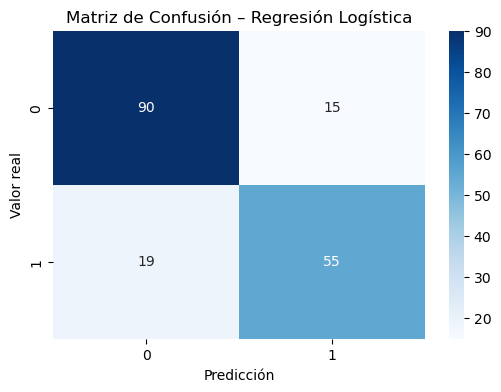

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalado de variables numericas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Entrenar el modelo
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión – Regresión Logística')
plt.show()

#### Segundo modelo: Decision Tree 

Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179



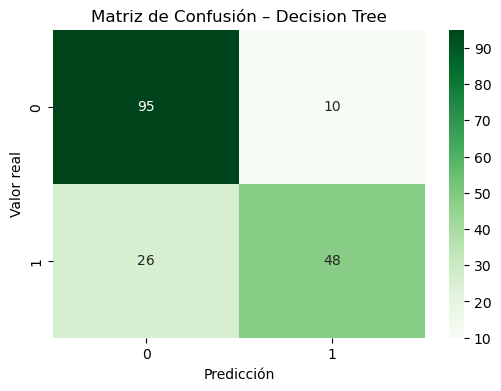

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5 
)

dt_model.fit(X_train, y_train)

# Predicción
y_pred_dt = dt_model.predict(X_test)

#Métricas del modelo
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión – Decision Tree')
plt.show()

#### Tercer modelo: Random Forest

Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



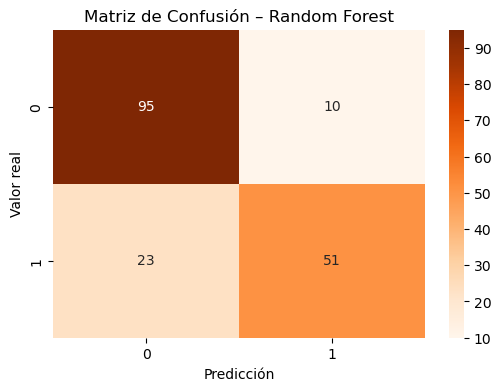

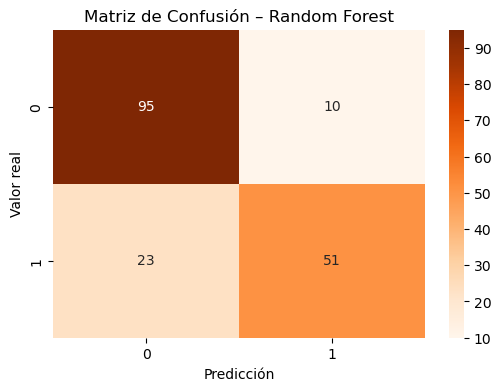

In [33]:
# Entrenar el modelo 
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=5
)

rf_model.fit(X_train, y_train)

#Predicción
y_pred_rf = rf_model.predict(X_test)

# Métricas del modelo
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión – Random Forest')
plt.show()

# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión – Random Forest')
plt.show()

### Resultados y análisis

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

In [35]:
results = {
    'Modelo': ['Regresión Logística', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precision': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf)
    ],
    'F1-score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf)
    ]
}

df_results = pd.DataFrame(results)
df_results


,Modelo,Accuracy,Precision,Recall,F1-score
0,Regresión Logística,0.810056,0.785714,0.743243,0.763889
1,Decision Tree,0.798883,0.827586,0.648649,0.727273
2,Random Forest,0.815642,0.836066,0.689189,0.755556


#### Conclusión:

Tras comparar los tres modelos de clasificación implementados, se observa que Random Forest presenta el mejor desempeño general, alcanzando el mayor accuracy y precision, lo que indica una mayor capacidad para clasificar correctamente a los pasajeros sobrevivientes.

La Regresión Logística mostró un desempeño muy competitivo, destacándose especialmente en recall, lo que sugiere una mejor detección de casos positivos.

El Árbol de Decisión obtuvo resultados aceptables, aunque inferiores, probablemente debido a su tendencia al sobreajuste incluso con una profundidad limitada.

## Opción B: Regresión – Medical Insurance Cost Dataset
Dataset: Medical Insurance Cost Dataset (Kaggle) https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset
Problema: Predecir el costo del seguro médico de una persona por medio de la variable númerica charges (costo del seguro)

### Preparación del entorno

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


### Carga de Dataset

In [37]:
ruta = r"C:\Users\vivia\OneDrive\Desktop\Data science\Ejercicios-BIT--Viviana-Gonzalez-\Python\Bases de datos\insurance.csv"
df = pd.read_csv(ruta)
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
df.shape


(1338, 7)

In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Limpieza de datos

In [41]:
# Revisar valores nulos
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [42]:
# Revisar duplicados
df.duplicated().sum()


np.int64(1)

In [43]:
# Eliminar filas duplicadas
df.drop_duplicates(inplace=True)


In [44]:
# Revisar tipos de datos
df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Análisis exploratorio EDA

In [45]:
# Ver columnas y tipos
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

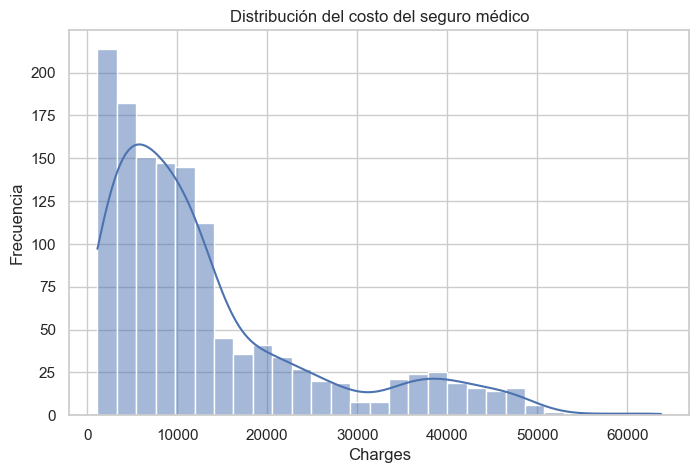

In [46]:
# Distribución de variable objetivo (charges)
sns.histplot(df["charges"], kde=True)
plt.title("Distribución del costo del seguro médico")
plt.xlabel("Charges")
plt.ylabel("Frecuencia")
plt.show()

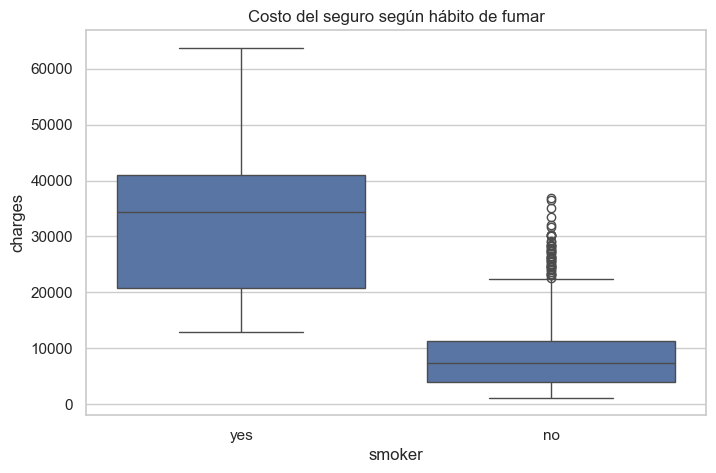

In [48]:
# Fumar influye en el costo?
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Costo del seguro según hábito de fumar")
plt.show()

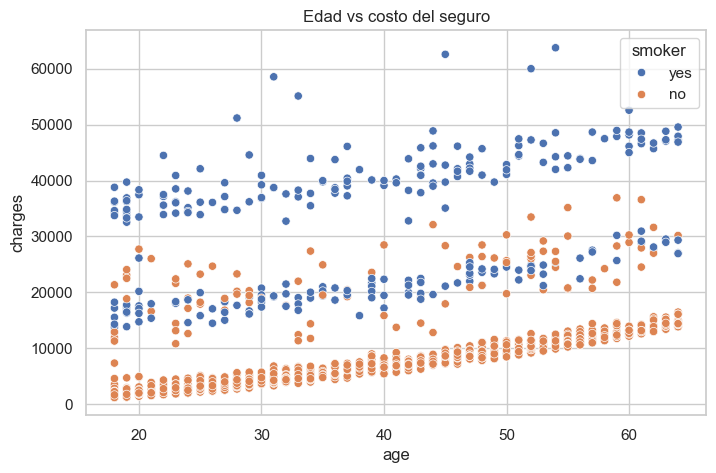

In [49]:
# Edad vs Costo del seguro
sns.scatterplot(x="age", y="charges", hue="smoker", data=df)
plt.title("Edad vs costo del seguro")
plt.show()

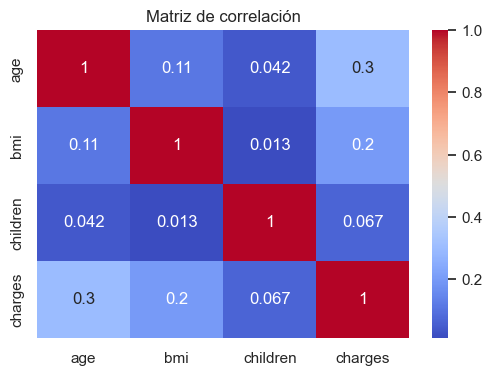

In [50]:
# Correlación entre variables numéricas
plt.figure(figsize=(6,4))
sns.heatmap(
    df[["age", "bmi", "children", "charges"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Matriz de correlación")
plt.show()

#### Análisis

El análisis exploratorio muestra que el costo del seguro médico está fuertemente influenciado por variables como la edad y el hábito de fumar. La variable smoker presenta una separación clara en los costos, mientras que variables como el número de hijos tienen poca influencia. La distribución sesgada de la variable objetivo sugiere que modelos no lineales podrían obtener mejor desempeño.

### Preprocesamiento de datos

In [51]:
# Separar X & Y
X = df.drop("charges", axis=1)
y = df["charges"]

X.head(), y.head()

(   age     sex     bmi  children smoker     region
 0   19  female  27.900         0    yes  southwest
 1   18    male  33.770         1     no  southeast
 2   28    male  33.000         3     no  southeast
 3   33    male  22.705         0     no  northwest
 4   32    male  28.880         0     no  northwest,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [52]:
# Identificar variables
X.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [53]:
# Crear preprocesador
categorical_features = ["sex", "smoker", "region"]
numerical_features = ["age", "bmi", "children"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

In [54]:
# Dividir Train and Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

X_train.shape, X_test.shape


((935, 6), (402, 6))

### Entrenamiento de modelos

In [55]:
# Función de evaluación
def evaluar_modelo(nombre, modelo):
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", modelo)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"📌 {nombre}")
    print(f"R²: {r2:.3f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}\n")
    
    return nombre, r2, mae, rmse, y_pred


In [56]:
# Entrenamiento de modelos
resultados = []

modelos = [
    ("Regresión Lineal", LinearRegression()),
    ("Random Forest", RandomForestRegressor(
        n_estimators=200, random_state=42
    )),
    ("SVR", SVR())
]

predicciones = {}

for nombre, modelo in modelos:
    nombre, r2, mae, rmse, y_pred = evaluar_modelo(nombre, modelo)
    resultados.append([nombre, r2, mae, rmse])
    predicciones[nombre] = y_pred


📌 Regresión Lineal
R²: 0.772
MAE: 4181.82
RMSE: 6240.21

📌 Random Forest
R²: 0.863
MAE: 2648.20
RMSE: 4847.23

📌 SVR
R²: -0.120
MAE: 8803.04
RMSE: 13843.88



In [57]:
resultados = []
predicciones = {}

for nombre, modelo in modelos:
    nombre, r2, mae, rmse, y_pred = evaluar_modelo(nombre, modelo)
    resultados.append([nombre, r2, mae, rmse])
    predicciones[nombre] = y_pred


📌 Regresión Lineal
R²: 0.772
MAE: 4181.82
RMSE: 6240.21

📌 Random Forest
R²: 0.863
MAE: 2648.20
RMSE: 4847.23

📌 SVR
R²: -0.120
MAE: 8803.04
RMSE: 13843.88



In [58]:
resultados_df = pd.DataFrame(
    resultados,
    columns=["Modelo", "R2", "MAE", "RMSE"]
)

resultados_df


,Modelo,R2,MAE,RMSE
0,Regresión Lineal,0.772436,4181.815957,6240.205920
1,Random Forest,0.862693,2648.203687,4847.226420
2,SVR,-0.120007,8803.042010,13843.883015


### Visualización real vs Predicción

In [59]:
# Función para graficar
def graficar_real_vs_predicho(nombre, y_real, y_pred):
    plt.figure(figsize=(6,5))
    plt.scatter(y_real, y_pred, alpha=0.5, color="teal")
    plt.plot([y_real.min(), y_real.max()],
             [y_real.min(), y_real.max()],
             color="red", linestyle="--", linewidth=2)
    plt.title(f"Real vs Predicho — {nombre}")
    plt.xlabel("Valores Reales (charges)")
    plt.ylabel("Predicciones")
    plt.show()


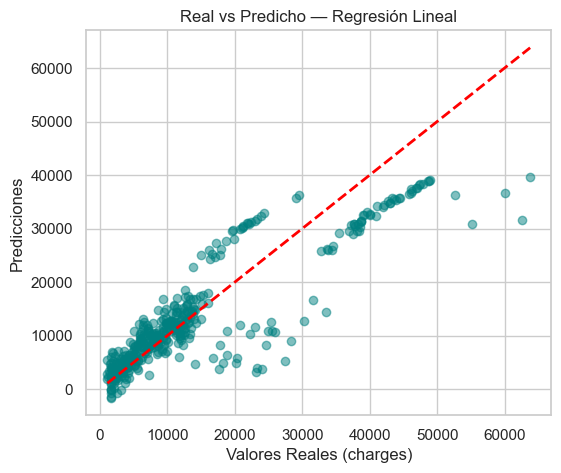

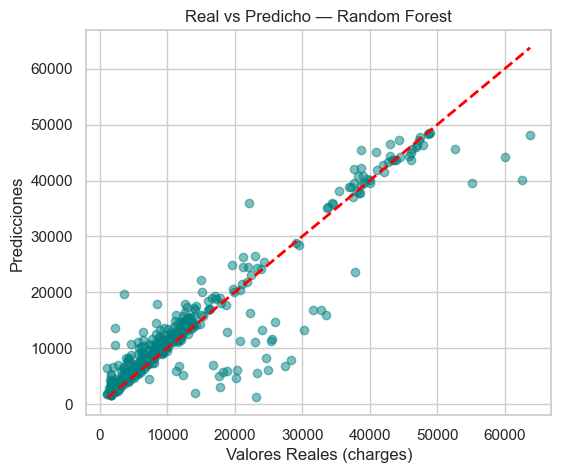

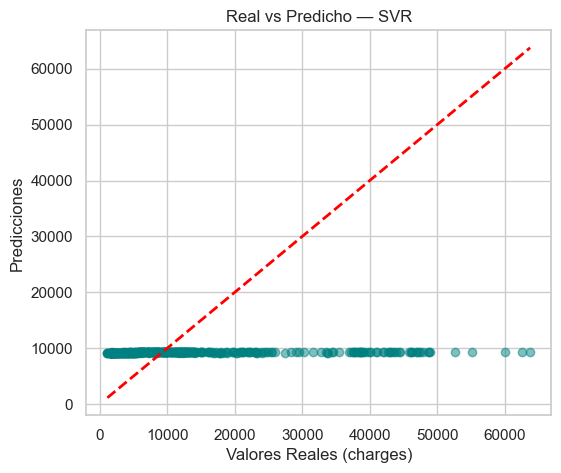

In [60]:
# Gráfica de modelos
for nombre, y_pred in predicciones.items():
    graficar_real_vs_predicho(nombre, y_test, y_pred)

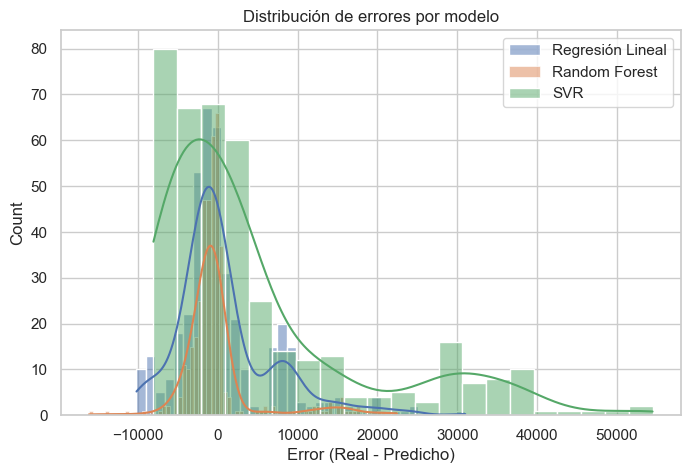

In [64]:
# Comparación de errores visual
for nombre, y_pred in predicciones.items():
    errores = y_test - y_pred
    sns.histplot(errores, kde=True, label=nombre, alpha=0.5)
    
plt.title("Distribución de errores por modelo")
plt.xlabel("Error (Real - Predicho)")
plt.legend()
plt.show()


### Comparación final de modelos

In [65]:
# Crear DataFrame con resultados
resultados_df = pd.DataFrame(
    resultados,
    columns=["Modelo", "R2", "MAE", "RMSE"]
).sort_values(by="R2", ascending=False)

resultados_df


,Modelo,R2,MAE,RMSE
1,Random Forest,0.862693,2648.203687,4847.226420
0,Regresión Lineal,0.772436,4181.815957,6240.205920
2,SVR,-0.120007,8803.042010,13843.883015


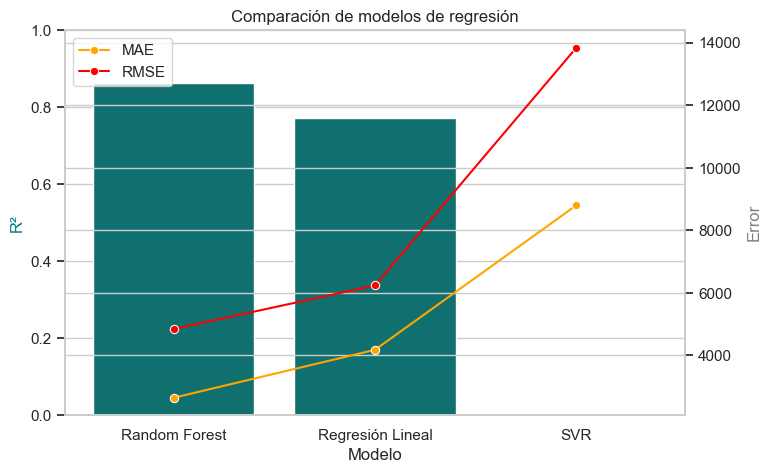

In [66]:
# Gráfica comparativa de métricas
# Gráfico de R2, MAE y RMSE
fig, ax1 = plt.subplots(figsize=(8,5))

# R2
sns.barplot(x="Modelo", y="R2", data=resultados_df, color="teal", ax=ax1)
ax1.set_ylabel("R²", color="teal")
ax1.set_ylim(0,1)

# Crear segundo eje para MAE y RMSE
ax2 = ax1.twinx()
sns.lineplot(x="Modelo", y="MAE", data=resultados_df, marker="o", color="orange", label="MAE", ax=ax2)
sns.lineplot(x="Modelo", y="RMSE", data=resultados_df, marker="o", color="red", label="RMSE", ax=ax2)
ax2.set_ylabel("Error", color="gray")

# Leyenda y título
ax2.legend(loc="upper left")
plt.title("Comparación de modelos de regresión")
plt.show()


### CONCLUSIONES FINALES:

El objetivo del proyecto fue predecir el costo del seguro médico (charges) a partir de variables demográficas y de hábitos de vida (age, sex, bmi, children, smoker, region). El análisis exploratorio mostró que fumar y la edad son las variables más influyentes, mientras que children tiene poca relevancia. Se aplicó preprocesamiento estándar, y se entrenaron tres modelos de regresión: Regresión Lineal, SVR y Random Forest. Donde random Forest fue el mejor modelo, con mayor R² y menores errores, ajustándose especialmente bien a los costos altos, mientras que la Regresión Lineal y SVR subestimaron los valores extremos.

A partir de estos hallazgos, se pueden implementar estrategias de negocio concretas:

- Segmentación de Primas por Riesgo: Dado que fumar incrementa los cargos de manera significativa (~$25,000 USD), se pueden establecer escalas de precios diferenciadas que reflejen este salto de riesgo.

- Programas de Prevención Focalizados: El IMC tiene un impacto moderado para la población general, pero crítico en fumadores; campañas de salud dirigidas a este segmento generarían mayor retorno en reducción de costos.

- Alerta de Casos Atípicos (Outliers): El modelo puede detectar clientes cuyos cargos reales superen ampliamente la predicción (~$4,847 RMSE), lo que podría indicar fraudes o condiciones médicas no reportadas.

- Optimización de Reservas Financieras: Con un R² de 86.2%, la empresa puede proyectar con mayor precisión el flujo de caja necesario para cubrir siniestros futuros, minimizando capital ocioso.